# ITP4869-Assignment
## IT114116/1A Group Mini-Project

# TOPIC: Computer Vision

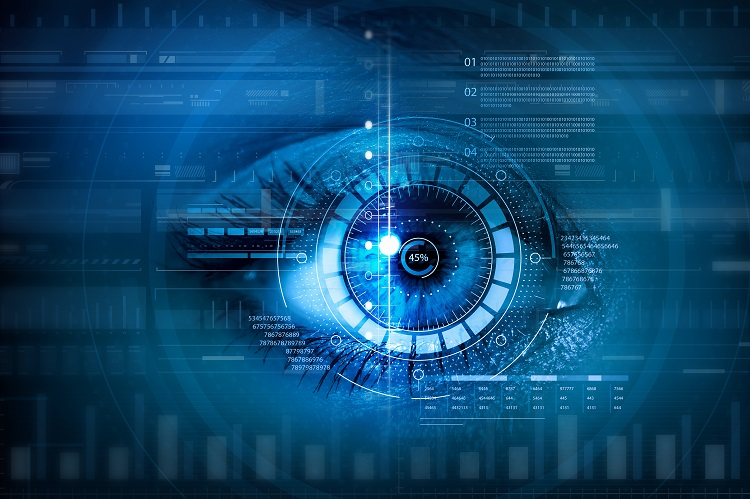

In [18]:
from IPython.display import Image
Image("img3.jpg")


# Section 1 : Introduce

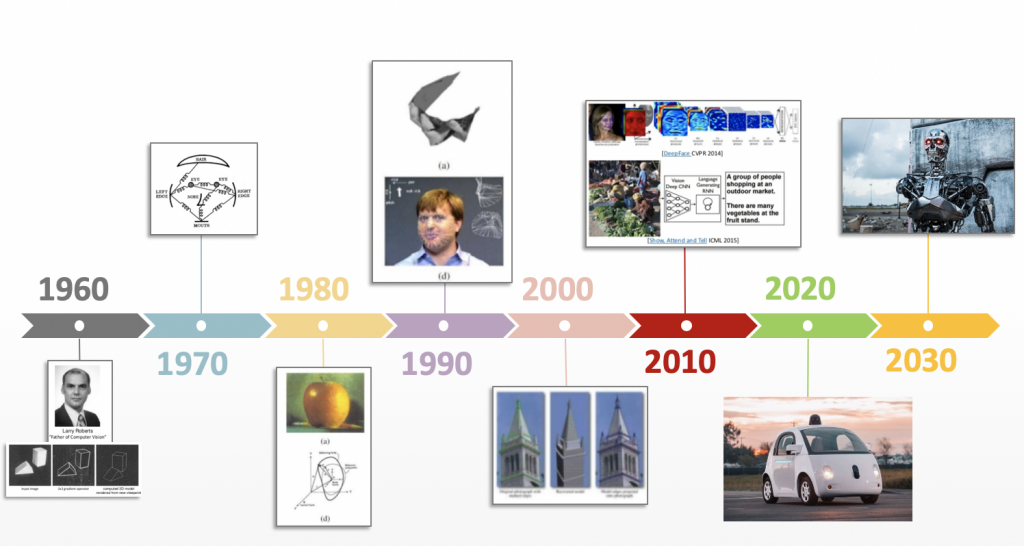

In [31]:
Image("img0.png")


# Microsoft Azure API

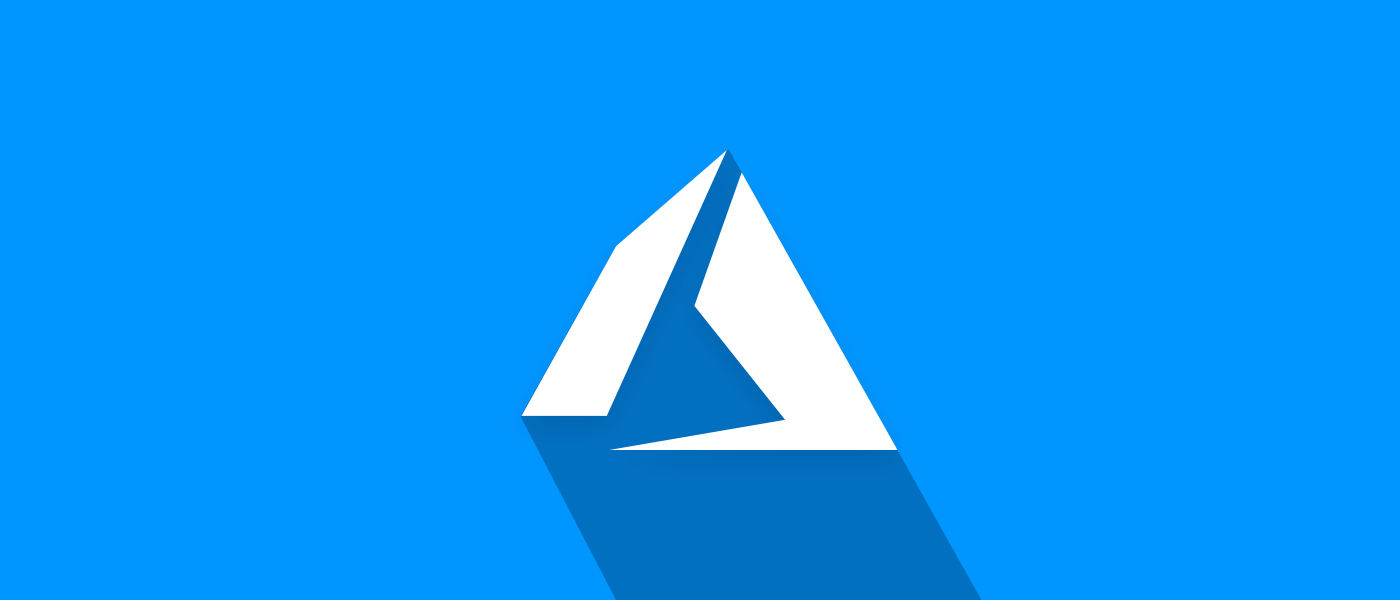

In [21]:
Image("img4.jpg")


# Section2: Coding

In [22]:
from matplotlib import pyplot as plt
import requests
import cv2
import time
import re
import numpy
import urllib.request


In [26]:
#AZURE API SETTING

base = 'https://westcentralus.api.cognitive.microsoft.com/vision/v2.0'
recog_url = f'{base}/recognizeText?mode=Printed'
key = '36006f8e88e145b4a1817a5a5ea451b3'
headers = {'Ocp-Apim-Subscription-Key': key}                           
headers_stream = {'Ocp-Apim-Subscription-Key': key,                    
                  'Content-Type': 'application/octet-stream'}  

In [27]:
#THE FUCTION OF HOW TO GET THE LICENSE NUMBER 
#THIS FUCTION WILL ENCODE PICTURE TO BYTES, AND SEND BACK TO SERVER
def get_license(img):
    img_encode = cv2.imencode('.jpg', img)[1]       
    img_bytes = img_encode.tobytes()               
    r1 = requests.post(recog_url,            
                              headers = headers_stream, 
                              data = img_bytes)
#IF THE SERVER RETURN STATUS CODE = 202 , THE FUNCTION WILL RETURN ERROR    
    if r1.status_code != 202:                
        print(r1.json())
        return 'Error'

    result_url = r1.headers['Operation-Location']
    r2 = requests.get(result_url, headers = headers) 
    while r2.status_code == 200 and r2.json()['status'] != 'Succeeded':
        r2 = requests.get(result_url, headers = headers)    
        time.sleep(0.5)
        print('status: ', r2.json()['status'])     
    
    carcard = ''  
    lines = r2.json()['recognitionResult']['lines']
    for i in range(len(lines)):
        text = lines[i]['text'] # 取得辨識文字
#THE CAR PLATLE NEED TO MATCH WITH CONDITIONS 
        m = re.match(r'^[\w]{2,4}[-. ][\w]{2,4}$', text)    
        if m != None:   
            carcard = m.group()
            return carcard
#IF THE SERVER RETUEN BLANK OUTPUT, FUNCION WILL RETURN "Sorry,Not Found" 
    if carcard == '':   
        return "Sorry,Not Found"


Please input the car Pattle Link: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTy8pTUdmmsTfZrPGg0Z8p0eJ8-19L3pAprbIUHBUKd0bYLxP46


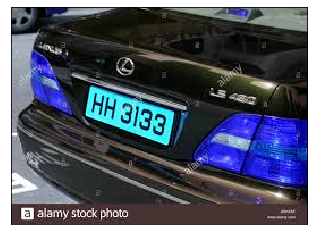

status:  Start
License Plate Number： HH 3133
status:  Finish


In [28]:
#USER CAN INPUT THE URL AND THIS FUCTION WILL CONVERT TO IMAGE 
def url_to_image(url):
    respone = urllib.request.urlopen(url)
    image = numpy.asarray(bytearray(respone.read()), dtype='uint8')
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return image
try:    
    url = input("Please input the car Pattle Link: ")
    img = url_to_image(url)
#AFTER USER INPUT THE URL, THE SYSTEM WILL SHOW THE IMAGE OF URL USING Matplotlib 
#OUTPUT
    plt.imshow(img)
    plt.xticks([]), plt.yticks([])  
    plt.show()
    print('status:  Start')
    text = get_license(img)      
    print('License Plate Number：', text)
    cv2.waitKey(0)              
    cv2.destroyAllWindows()    
    print('status:  Finish')
except:
    print('Read Picture Error')

